In [1]:
import requests
import csv
api_key = "e820483f9bdf5fd7b2867986f350f5d6"


In [3]:
def get_open_weather():
    cities = ['Moscow', 'Boston', 'Tokyo']
    weather_data = []

    for city in cities:
        url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}"
        response = requests.get(url)
        data = response.json()

        if response.status_code == 200:
            city_name = data['city']['name']
            for forecast in data['list']:
                if forecast['dt_txt'].startswith('2024-08'):
                    temperature = round(float(forecast['main']['temp']) - 273.15, 2)
                    weather_data.append({
                        'city': city_name,
                        'Date': forecast['dt_txt'],
                        'temperature': temperature,
                        'Weather': forecast['weather'][0]['description']
                    })
            if not weather_data:
                print(f"No weather data available for {city}8")
        else:
            print(f"Failed to retrieve weather data for {city}")

    return weather_data

def save_data_to_csv(weather_data):
    with open('OpenWeatherMap.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['City', 'Date', 'Temperature', 'Weather'])
        for data in weather_data:
            writer.writerow([data['city'], data['Date'], data['temperature'], data['Weather']])

weather_data = get_open_weather()
save_data_to_csv(weather_data)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('OpenWeatherMap.csv')
df.head()

,City,Date,Temperature,Weather
0,Moscow,2024-08-18 12:00:00,26.97,few clouds
1,Moscow,2024-08-18 15:00:00,26.65,scattered clouds
2,Moscow,2024-08-18 18:00:00,23.99,scattered clouds
3,Moscow,2024-08-18 21:00:00,20.04,few clouds
4,Moscow,2024-08-19 00:00:00,18.79,few clouds


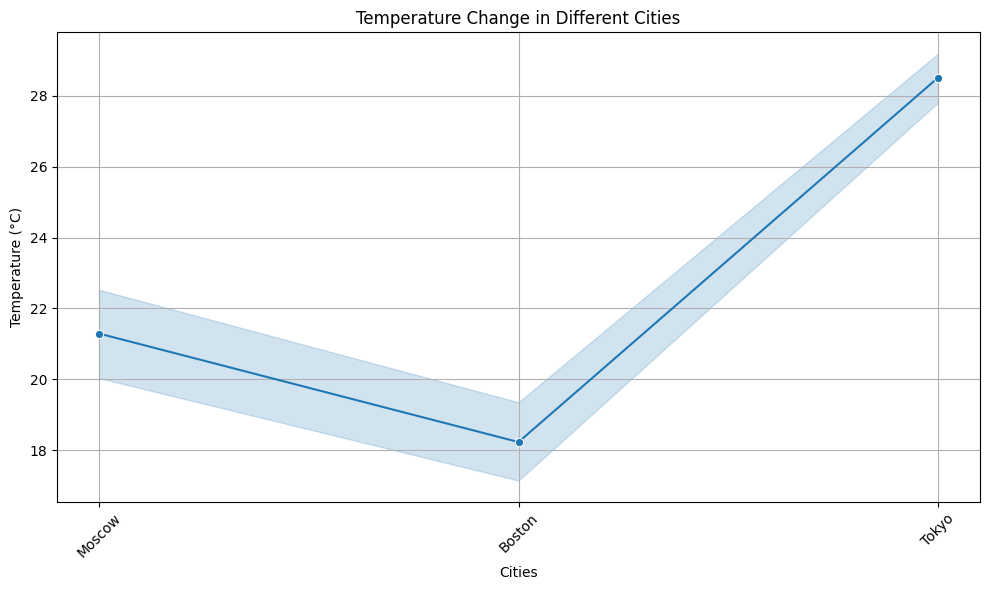

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='City', y='Temperature', marker='o')
plt.title('Temperature Change in Different Cities')
plt.xlabel('Cities')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('temperature_change.png')
plt.show()

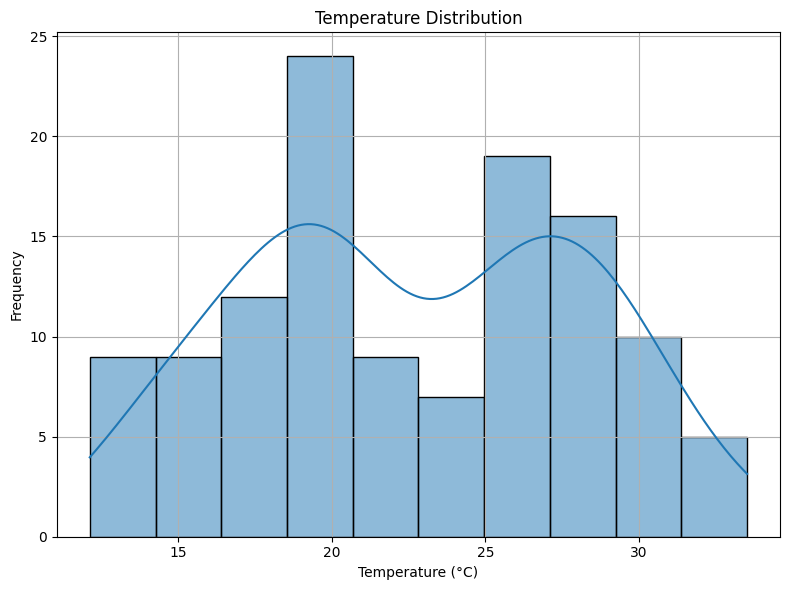

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature'], bins=10, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig('temperature_distribution.png')
plt.show()

In [2]:
from hdfs import InsecureClient

In [ ]:
client = InsecureClient('http://localhost:50070')
with client.write('temperature_distribution.png', encoding='utf-8') as writer:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='City', y='Temperature', marker='o')
    plt.title('Temperature Change in Different Cities')
    plt.xlabel('Cities')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(writer)

Здесь случилась неприятность, юзернейм на кириллице...

HdfsError: Invalid value for webhdfs parameter "user.name": Invalid value:does not belong to the domain ^[A-Za-z_][A-Za-z0-9._-]*[$]?$

In [ ]:
with client.write('temperature_distribution.png', encoding='utf-8') as writer:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Temperature'], bins=10, kde=True)
    plt.title('Temperature Distribution')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(writer)

In [ ]:
client.download('temperature_change.png', 'temperature_change_hdfs.png', overwrite=True)
client.download('/temperature_distribution.png', 'temperature_distribution_hdfs.png', overwrite=True)